#SVM

In [1]:
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, accuracy_score, precision_score

from google.colab import files
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)
colors = sns.color_palette(n_colors=15)

In [2]:
hotels_train_url = "https://raw.githubusercontent.com/agomezalejo/7506R-1C2023-GRUPO22/main/df_hotel_v3.csv"
hotels_test_url = "https://raw.githubusercontent.com/agomezalejo/7506R-1C2023-GRUPO22/main/hotels_test.csv"
df_original = pd.read_csv(hotels_train_url)
df_hotel_test = pd.read_csv(hotels_test_url)
df_hotel_test_con_is_canceled = df_hotel_test.copy()
df_hotel = df_original.copy()

In [3]:
df_hotel_test = df_hotel_test.drop('id', axis=1)
df_hotel_test = df_hotel_test.drop('arrival_date_week_number', axis=1)
df_hotel_test = df_hotel_test.drop('reservation_status_date', axis=1)
df_hotel_test['children'] = df_hotel_test['children'].astype(int)
df_hotel['is_repeated_guest'] = df_hotel['is_repeated_guest'].astype(int)
df_hotel['is_canceled'] = df_hotel['is_canceled'].astype(int)
df_hotel_test['company'] = df_hotel_test['company'].fillna('not company')
df_hotel_test['company'] = df_hotel_test['company'].astype(str)
df_hotel_test['agent'] = df_hotel_test['agent'].fillna('not agent')
df_hotel_test['agent'] = df_hotel_test['agent'].astype(str)

In [4]:
# Contamos los valores faltantes
num_missing = df_hotel.isna().sum()
print("El número total de valores faltantes en el DataFrame es:", num_missing.sum())

El número total de valores faltantes en el DataFrame es: 0


In [5]:
def cambiar_columna_por_probabilidad_is_canceled(columna):
  global df_hotel_test, df_hotel
  probabilidades = df_hotel.groupby(columna)['is_canceled'].mean()
  nueva_columna = columna+'_prob_is_canceled'

  df_hotel[nueva_columna] = 0
  df_hotel[nueva_columna] = df_hotel[columna].map(probabilidades)

  df_hotel_test[nueva_columna] = 0
  df_hotel_test[nueva_columna] = df_hotel_test[columna].map(probabilidades)

  mediana = df_hotel_test[nueva_columna].median()
  df_hotel_test[nueva_columna].fillna(mediana, inplace=True)

  df_hotel_test = df_hotel_test.drop(columna, axis=1)
  df_hotel = df_hotel.drop(columna, axis=1)

In [6]:
cambiar_columna_por_probabilidad_is_canceled('country')
cambiar_columna_por_probabilidad_is_canceled('agent')
cambiar_columna_por_probabilidad_is_canceled('company')

In [7]:
X = df_hotel.drop('is_canceled', axis=1)
y = df_hotel['is_canceled']

columns = ['hotel','arrival_date_year', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel','deposit_type', 'customer_type', 'assigned_room_type', 'reserved_room_type']

X = pd.get_dummies(X, columns=columns, drop_first=True)

df_hotel_test = pd.get_dummies(df_hotel_test, columns=columns, drop_first=True)

In [8]:
columns_X = set(X.columns)
columns_test = set(df_hotel_test.columns)

missing_columns = list(columns_X - columns_test)
for column in missing_columns:
    df_hotel_test[column] = 0

df_hotel_test = df_hotel_test[X.columns]

In [9]:
def metricas(y_pred,y_test):

  print(classification_report(y_test,y_pred))
  
  cm = confusion_matrix(y_test,y_pred)
  sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')

In [10]:
#Creo conjuntos de train y test 80-20
x_train, x_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

#Armamos una version escalada con minmax
min_max_scaler = preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train) 
x_test_minmax  = min_max_scaler.transform(x_test) 

#Creo un clasificador con kernel lineal
clf = SVC(kernel='linear', C=5)
clf.fit(x_train_minmax, y_train)

y_pred=clf.predict(x_test_minmax)

f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("F1_score en el conjunto de prueba:", f1)
print("Accuracy en el conjunto de prueba:", accuracy)
print("Precision en el conjunto de prueba:", precision)

F1_score en el conjunto de prueba: 0.8181081956592161
Accuracy en el conjunto de prueba: 0.8173686778337941
Precision en el conjunto de prueba: 0.8107544141252007


In [11]:
x_train, x_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

min_max_scaler = preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train) 
x_test_minmax  = min_max_scaler.transform(x_test) 

#Creo un clasificador con kernel polinomial
clf = SVC(kernel='poly', C=5)
clf.fit(x_train_minmax, y_train)

y_pred=clf.predict(x_test_minmax)

f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("F1_score en el conjunto de prueba:", f1)
print("Accuracy en el conjunto de prueba:", accuracy)
print("Precision en el conjunto de prueba:", precision)

F1_score en el conjunto de prueba: 0.8528870024825819
Accuracy en el conjunto de prueba: 0.8506261180679785
Precision en el conjunto de prueba: 0.8360810174281676


In [12]:
x_train, x_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

min_max_scaler = preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train) 
x_test_minmax  = min_max_scaler.transform(x_test) 

#Creo un clasificador con kernel radial
clf = SVC(kernel='rbf', C=5)
clf.fit(x_train_minmax, y_train)

y_pred=clf.predict(x_test_minmax)

f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("F1_score en el conjunto de prueba:", f1)
print("Accuracy en el conjunto de prueba:", accuracy)
print("Precision en el conjunto de prueba:", precision)

F1_score en el conjunto de prueba: 0.8535531370038412
Accuracy en el conjunto de prueba: 0.8511953163115954
Precision en el conjunto de prueba: 0.8361555346503606


Se puede observar un mejor puntaje F1 cuando se usa un kernel radial.

## Cross Validation

Por temas de tiempo, RandomizedSearchCV tiene solo 5 iteraciones. Los rangos de valores que toman los hiperparámetros descritos fueron obtenidos optimizando el modelo con 10 iteraciones, lo cual tomó cerca de 4 horas. Consideramos que este tiempo podría haberse reducido aplicando tecnicas de reducción de la dimensionalidad.
 Además, sucede que la cantidad de tiempo que toma correr el código aumenta enormemente mientras mayor sea el número de iteraciones.

In [18]:
svm_param_grid = {
    'C': list(range(1,20)),
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': list(range(0,10)),
    'gamma': list(np.linspace(0.01,0.05,1)) + ['scale', 'auto'],
    'coef0': np.linspace(0.0001,0.0005,1),
    'tol': np.linspace(0.00001,0.00005,1),
    'max_iter': list(range(-1,40)),
    'class_weight': [None, 'balanced']
}

x_train, x_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

#Hacemos una version escalada con minmax
min_max_scaler = preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train) 
x_test_minmax  = min_max_scaler.transform(x_test) 

model = SVC()

random_search = RandomizedSearchCV(model, param_distributions=svm_param_grid, scoring='f1', cv=10, n_iter=5, random_state=42)
random_search.fit(x_train_minmax, y_train) 

best_params = random_search.best_params_
best_model = SVC(**best_params)

best_model.fit(x_train_minmax, y_train)

y_pred=best_model.predict(x_test_minmax)

f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Mejores hiperparámetros encontrados:", best_params)
print("F1_score en el conjunto de prueba:", f1)
print("Accuracy en el conjunto de prueba:", accuracy)
print("Precision en el conjunto de prueba:", precision)

Mejores hiperparámetros encontrados: {'tol': 1e-05, 'max_iter': 35, 'kernel': 'poly', 'gamma': 'auto', 'degree': 4, 'coef0': 0.0001, 'class_weight': None, 'C': 17}
F1_score en el conjunto de prueba: 0.6609427977687848
Accuracy en el conjunto de prueba: 0.49585298422507723
Precision en el conjunto de prueba: 0.49663050624589083


              precision    recall  f1-score   support

           0       0.42      0.01      0.02      6180
           1       0.50      0.99      0.66      6118

    accuracy                           0.50     12298
   macro avg       0.46      0.50      0.34     12298
weighted avg       0.46      0.50      0.34     12298



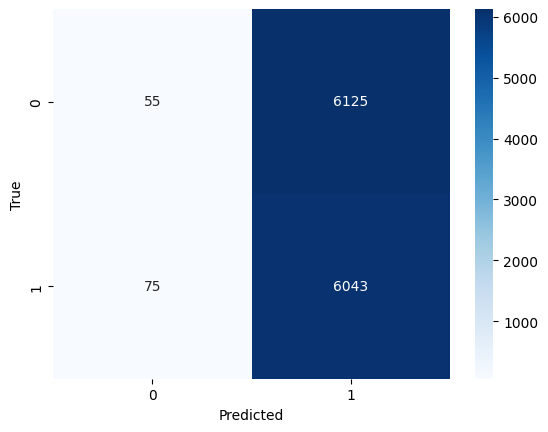

In [19]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

print(classification_report(y_test,y_pred))

<p>Al ver la matriz de confusión notamos que el modelo está prediciendo como verdaderas a la gran mayoría de las entradas, y a esto se debe el puntaje F1 bajo. Esto se puede deber a la mala selección de hiperparámetros como consecuencia de la baja cantidad de iteraciones utilizadas.<p>
<p>Por ejemplo, un parámetro C alto puede estar sobreentrenando nuestro modelo, o un kernel incorrecto que haga que se separen incorrectamente las clases. Esto último es interesante destacarlo, ya que al optimizar hiperparámetros se obtiene que el kernel polinomial es el más adecuado, mientras que en el análisis previo se observa mejores resultados usando el kernel radial.<p>

In [ ]:
import joblib
joblib.dump(best_model, 'modelo_xgb_final.pkl')
loaded_model = joblib.load('modelo_xgb_final.pkl')
predicciones = loaded_model.predict(df_hotel_test)

In [ ]:
df_sub = pd.DataFrame({'id': df_hotel_test_con_is_canceled['id'], 'is_canceled': predicciones})
df_sub.to_csv('prediccion_XGB_1.csv', index=False)